###################### Coordinates Domain ######################
Longitude boundaries: 159.23333740234375 to 172.34999084472656
Latitude boundaries: -28.803945541381836 to -15.699763298034668


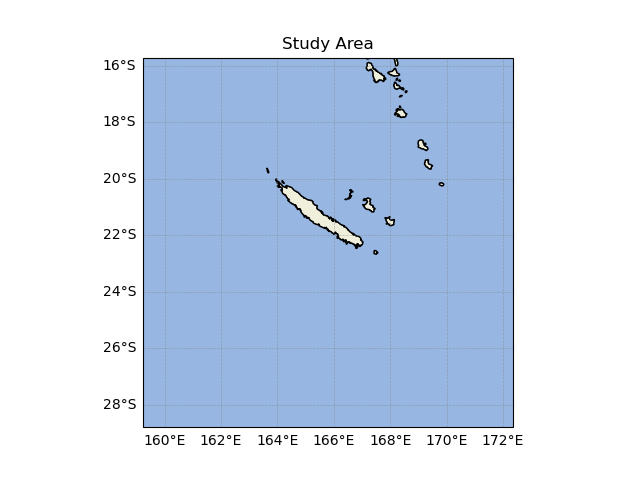

In [20]:
# Improve by ChatGPT & GitHub Copilot

# Running the requierements.ipynb
%run requierements.ipynb

# Loading the data 
%run data_loading.ipynb #january 2014



# Exercises on CALEDO

## 1D Plotting

### SSH Time Series

Plot the time serie of SSH at a certain point (e. g. LON : E 167° ; LAT S 24°) over 1 month

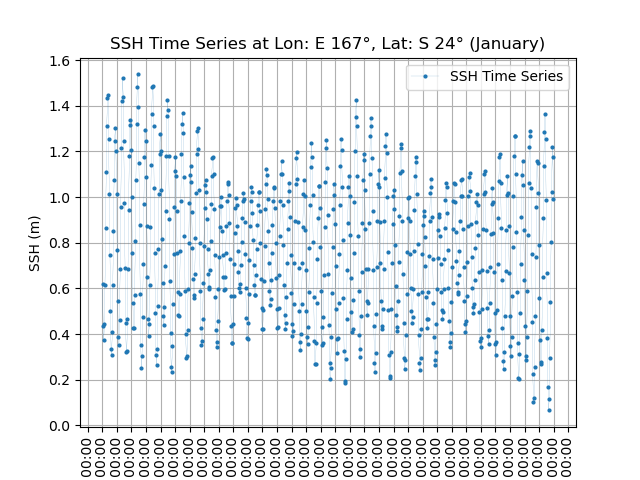

In [21]:
# Coordinates of the point of interest
lon_target = 167.0  # Longitude E 167°
lat_target = -24.0  # Latitude S 24° (negative for South)

# Find the closest grid point. This example uses simple Euclidean distance
# for demonstration, assuming a small region and not accounting for the
# curvature of the Earth. For large regions, consider using geopy or
# another method to calculate distances more accurately.
abs_diff_lon = np.abs(SSH_01['nav_lon'] - lon_target)
abs_diff_lat = np.abs(SSH_01['nav_lat'] - lat_target)
min_diff = (abs_diff_lon + abs_diff_lat).argmin()
closest_point = np.unravel_index(min_diff, SSH_01['nav_lon'].shape)

# Extract the SSH time series data for the closest grid point
ssh_time_series = SSH_01['zos'][:, closest_point[0], closest_point[1]]

# Plot the time series data
plt.figure(#figsize=(17, 6)
           )
plt.plot(SSH_01['time_counter'], ssh_time_series, label='SSH Time Series',
         marker='.', markersize=4, 
         linestyle='-',linewidth=0.1,
         #linestyle='none' 
         )
plt.xlabel('Time')
plt.ylabel('SSH (m)')
plt.title('SSH Time Series at Lon: E 167°, Lat: S 24° (January)')
plt.legend()
plt.grid(True)
# Set daily x-axis markers
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()



### Multiple Time Series

Plot the time series of SSH at 3 different points (on the same plot) over 1 month

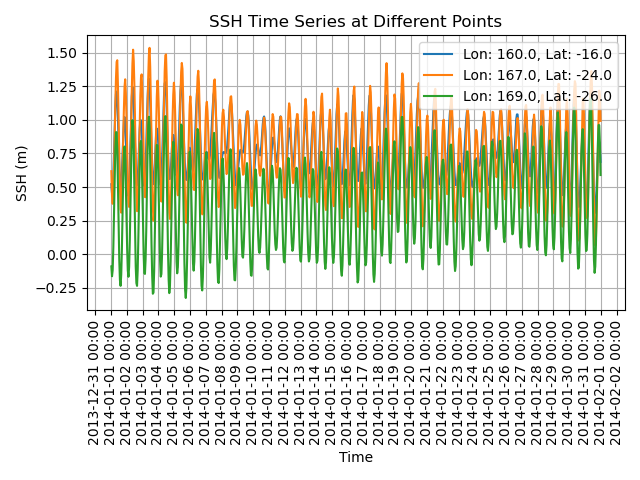

In [22]:
points = [
    {'lon': 160.0, 'lat': -16.0},  # Point 1
    {'lon': 167.0, 'lat': -24.0},  # Point 2
    {'lon': 169.0, 'lat': -26.0}   # Point 3
]

# Plotting
plt.figure(#figsize=(17, 6)
           )

for point in points:
    lon_target, lat_target = point['lon'], point['lat']
    abs_diff_lon = abs(SSH_01['nav_lon'] - lon_target)
    abs_diff_lat = abs(SSH_01['nav_lat'] - lat_target)
    min_diff = (abs_diff_lon + abs_diff_lat).argmin()
    closest_point = np.unravel_index(min_diff, SSH_01['nav_lon'].shape)
    
    ssh_time_series = SSH_01['zos'][:, closest_point[0], closest_point[1]]
    
    plt.plot(SSH_01['time_counter'], ssh_time_series, label=f'Lon: {lon_target}, Lat: {lat_target}')

plt.xlabel('Time')
plt.ylabel('SSH (m)')
plt.title('SSH Time Series at Different Points')
plt.legend()
plt.grid(True)
# Set daily x-axis markers
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Moving Average

Plot the moving average with a window of 2 days of the SSH over 1 month, compare with raw SSH.

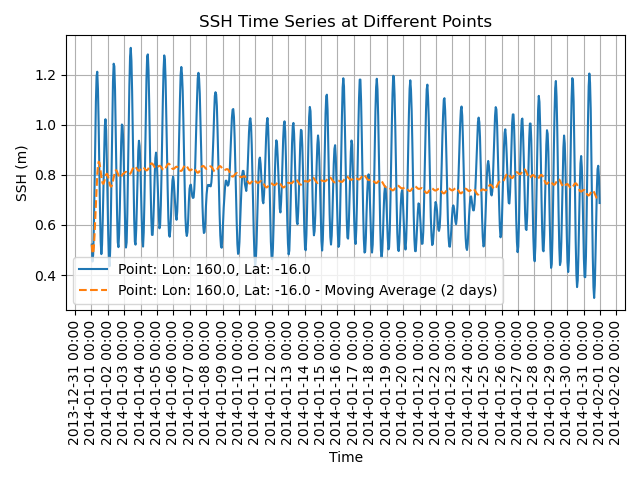

In [23]:
points = [
    {'lon': 160.0, 'lat': -16.0},  # Point 1
    #{'lon': 167.0, 'lat': -24.0},  # Point 2
    #{'lon': 169.0, 'lat': -26.0}   # Point 3
]

# Plotting
plt.figure(#figsize=(10, 6)
           )

for point in points:
    lon_target, lat_target = point['lon'], point['lat']
    abs_diff_lon = abs(SSH_01['nav_lon'] - lon_target)
    abs_diff_lat = abs(SSH_01['nav_lat'] - lat_target)
    min_diff = (abs_diff_lon + abs_diff_lat).argmin()
    closest_point = np.unravel_index(min_diff, SSH_01['nav_lon'].shape)
    
    ssh_time_series = SSH_01['zos'][:, closest_point[0], closest_point[1]]
    
    # Compute moving average with a window of 2 days # Change time counter to days (48h)!
    moving_avg = ssh_time_series.rolling(time_counter=48, min_periods=1).mean()
    
    plt.plot(SSH_01['time_counter'], ssh_time_series, label=f'Point: Lon: {lon_target}, Lat: {lat_target}')
    plt.plot(SSH_01['time_counter'], moving_avg, label=f'Point: Lon: {lon_target}, Lat: {lat_target} - Moving Average (2 days)', linestyle='--')

plt.xlabel('Time')
plt.ylabel('SSH (m)')
plt.title('SSH Time Series at Different Points')
plt.legend()
plt.grid(True)
# Set daily x-axis markers
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()